<a href="https://githubtocolab.com/geonextgis/geeagri/blob/main/docs/examples/timeseries_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geeagri](https://geonextgis.github.io/geeagri) if needed.



In [ ]:
# 📦 Imports
import os
import pandas as pd
from omegaconf import OmegaConf
from datetime import datetime
from hydra import initialize, compose
from climdata.utils.utils_download import (
    fetch_MSWX, fetch_dwd, fetch_dwd_loc,
    fetch_ee_loc, fetch_ee_loc_mod,
    extract_ts_MSWX, extract_ts_dwd,
    build_output_filename
)


In [3]:
# 🔧 Initialize Hydra and load config with overrides
overrides = [
    "dataset=mswx",                    # other options: dwd, dwd_hyras, gddp, era5-land
    "weather.parameter=pr",
    "time_range.start_date=2014-01-01",
    "time_range.end_date=2014-01-04",
    "location.lat=48.1351",
    "location.lon=11.5761",
    "output.out_dir=./data"
]

with initialize(config_path="climdata/conf", version_base="1.3"):
    cfg = compose(config_name="config", overrides=overrides)

# 💡 View resolved config
# OmegaConf.to_container(cfg, resolve=True)


MissingConfigException: Primary config directory not found.
Check that the config directory '/beegfs/muduchuru/pkgs_fnl/climdata/docs/examples/climdata/conf' exists and readable

In [63]:
# 📁 Generate output filename
cfg.output.filename = build_output_filename(cfg)
output_path = os.path.join(cfg.output.out_dir, cfg.output.filename)

print("📁 Output file will be:", output_path)


📁 Output file will be: ./data/mswx_pr_LAT48.1351_LON11.5761_2014-01-01_2014-01-04.csv


In [64]:
# 🚀 Fetch + extract time series
provider = cfg.dataset.lower()

if provider == "mswx":
    fetch_MSWX(cfg)
    df_out = extract_ts_MSWX(cfg)
elif provider == "dwd_hyras":
    fetch_dwd(cfg)
    df_out = extract_ts_dwd(cfg)
elif provider == "dwd":
    df_out = fetch_dwd_loc(cfg)
elif provider == "gddp":
    df_out = fetch_ee_loc(cfg)
elif provider == "era5-land":
    df_out = fetch_ee_loc_mod(cfg)
else:
    raise NotImplementedError(f"Provider '{provider}' is not supported.")


✅ All 4 files already exist locally. No download needed.
📂 Opening: ./data/mswx/pr/2014001.nc
📂 Opening: ./data/mswx/pr/2014002.nc
📂 Opening: ./data/mswx/pr/2014003.nc
📂 Opening: ./data/mswx/pr/2014004.nc
✅ Saved MSWX time series to: /beegfs/muduchuru/codes/python/download/data/mswx_pr_LAT48.1351_LON11.5761_2014-01-01_2014-01-04.csv


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from hydra import initialize, compose
from omegaconf import OmegaConf

from utils.utils_download import (
    fetch_MSWX, extract_ts_MSWX,
    fetch_dwd, extract_ts_dwd,
    fetch_dwd_loc, fetch_ee_loc, fetch_ee_loc_mod,
    build_output_filename
)


datasets = ["mswx", "dwd_hyras", "dwd", "gddp", "era5-land"]
parameter = "tasmax"

overrides_base = [
    f"weather.parameter={parameter}",
    "time_range.start_date=2014-01-01",
    "time_range.end_date=2014-12-31",
    "location.lat=48.1351",
    "location.lon=11.5761"
]

df_all = []

with initialize(config_path="conf", version_base="1.3"):
    for ds in datasets:
        print(f"🔄 Processing: {ds}")
        overrides = [f"dataset={ds}"] + overrides_base
        cfg = compose(config_name="config", overrides=overrides)
        # 📁 Generate output filename
        cfg.output.filename = build_output_filename(cfg)
        output_path = os.path.join(cfg.output.out_dir, cfg.output.filename)

        print("📁 Output file will be:", output_path)

        try:
            if ds == "mswx":
                fetch_MSWX(cfg)
                df_out = extract_ts_MSWX(cfg)
            elif ds == "dwd_hyras":
                fetch_dwd(cfg)
                df_out = extract_ts_dwd(cfg)
            elif ds == "dwd":
                df_out = fetch_dwd_loc(cfg)
            elif ds == "gddp":
                df_out = fetch_ee_loc(cfg)
            elif ds == "era5-land":
                df_out = fetch_ee_loc_mod(cfg)
            else:
                continue
            df_all.append(df_out)
        except Exception as e:
            print(f"⚠️  Failed to load {ds}: {e}")


🔄 Processing: mswx
✅ All 365 files already exist locally. No download needed.
📂 Opening: ./data/mswx/tasmax/2014001.nc
📂 Opening: ./data/mswx/tasmax/2014002.nc
📂 Opening: ./data/mswx/tasmax/2014003.nc
📂 Opening: ./data/mswx/tasmax/2014004.nc
📂 Opening: ./data/mswx/tasmax/2014005.nc
📂 Opening: ./data/mswx/tasmax/2014006.nc
📂 Opening: ./data/mswx/tasmax/2014007.nc
📂 Opening: ./data/mswx/tasmax/2014008.nc
📂 Opening: ./data/mswx/tasmax/2014009.nc
📂 Opening: ./data/mswx/tasmax/2014010.nc
📂 Opening: ./data/mswx/tasmax/2014011.nc
📂 Opening: ./data/mswx/tasmax/2014012.nc
📂 Opening: ./data/mswx/tasmax/2014013.nc
📂 Opening: ./data/mswx/tasmax/2014014.nc
📂 Opening: ./data/mswx/tasmax/2014015.nc
📂 Opening: ./data/mswx/tasmax/2014016.nc
📂 Opening: ./data/mswx/tasmax/2014017.nc
📂 Opening: ./data/mswx/tasmax/2014018.nc
📂 Opening: ./data/mswx/tasmax/2014019.nc
📂 Opening: ./data/mswx/tasmax/2014020.nc
📂 Opening: ./data/mswx/tasmax/2014021.nc
📂 Opening: ./data/mswx/tasmax/2014022.nc
📂 Opening: ./data/ms

Processing images: 100%|██████████| 364/364 [09:24<00:00,  1.55s/it]

[✓] Saved timeseries to: /beegfs/muduchuru/codes/python/download/data/{provider}_{parameter}_LAT{lat}_LON{lon}_{start}_{end}.csv


In [50]:
import pandas as pd
import pint
import pint_pandas

# Setup
ureg = pint.UnitRegistry()
ureg.setup_matplotlib()
pint_pandas.PintType.ureg = ureg

# Concatenate input
df = pd.concat(df_all)

# Standardize units
unit_map = {
    "degree_Celsius": "degC",
    "degC": "degC",
    "K": "kelvin"
}
df["pint_units"] = df["units"].map(unit_map)

# Construct Quantity objects
quantities = [ureg.Quantity(v, u) for v, u in zip(df["value"], df["pint_units"])]

# Assign with index aligned
df["value"] = pd.Series(quantities, index=df.index, dtype="pint[degC]")

# Convert all to degC
df["value"] = df["value"].pint.to("degC")

# Clean up
df["units"] = "degC"
df.drop(columns="pint_units", inplace=True)

# Ensure proper datetime formatting
df["time"] = pd.to_datetime(df["time"], utc=True).dt.tz_localize(None)


In [52]:
df

,latitude,longitude,time,source,variable,value,units
0,48.1351,11.5761,2014-01-01 00:00:00,MSWX,air_temperature,4.0625,degC
0,48.1351,11.5761,2014-01-01 00:00:00,ERA5-LAND,tasmax,5.381005859375023,degC
0,48.1351,11.5761,2014-01-01 00:00:00,GDDP,tasmax,7.476525878906273,degC
0,48.1351,11.5761,2014-01-01 00:00:00,DWD,tasmax,7.75,degC
0,48.1351,11.5761,2014-01-01 12:00:00,DWD_HYRAS,tasmax,6.500000096857548,degC
...,...,...,...,...,...,...,...
363,48.1351,11.5761,2014-12-30 00:00:00,GDDP,tasmax,8.802819824218773,degC
363,48.1351,11.5761,2014-12-30 00:00:00,ERA5-LAND,tasmax,-1.9494689941406023,degC
363,48.1351,11.5761,2014-12-30 12:00:00,DWD_HYRAS,tasmax,-1.3000000193715096,degC
364,48.1351,11.5761,2014-12-31 00:00:00,MSWX,air_temperature,0.25,degC


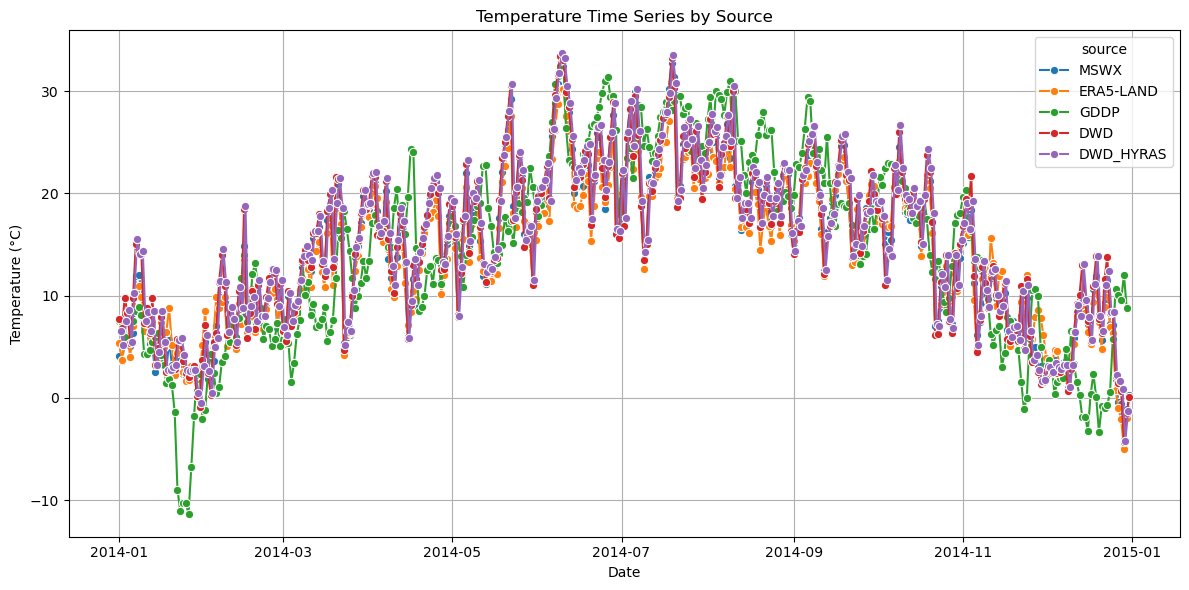

In [56]:
df = df.sort_values("time")

# Plot as before
import matplotlib.pyplot as plt
import seaborn as sns

df['temp_C'] = df['value'].pint.m

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="temp_C", hue="source", marker='o')
plt.title("Temperature Time Series by Source")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


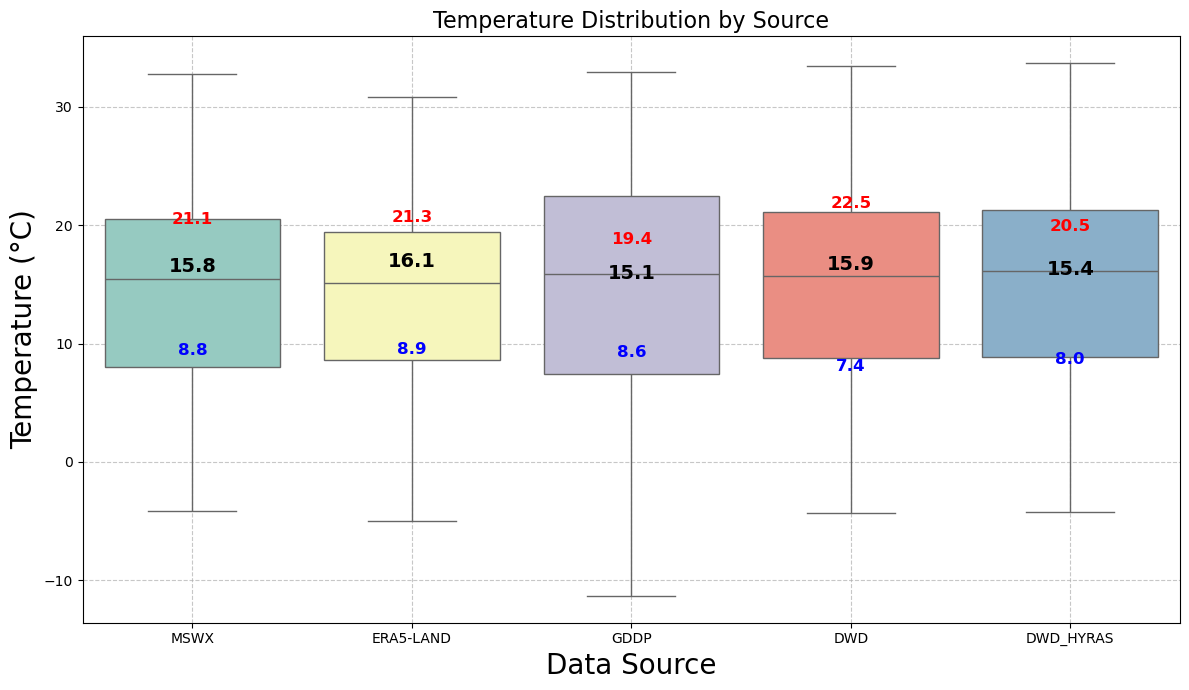

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Colorful boxplot with a palette
sns.boxplot(data=df, x="source", y="temp_C", palette="Set3")

plt.title("Temperature Distribution by Source", fontsize=16)
plt.xlabel("Data Source", fontsize=20)   # bigger x-label font size
plt.ylabel("Temperature (°C)", fontsize=20)  # bigger y-label font size
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate median, Q1, Q3 for each box
grouped = df.groupby("source")["temp_C"]

for i, (source, values) in enumerate(grouped):
    q1 = values.quantile(0.25)
    median = values.median()
    q3 = values.quantile(0.75)

    x = i  

    plt.text(x, median, f"{median:.1f}", ha='center', va='bottom', 
             fontsize=14, fontweight='bold', color='black')

    plt.text(x, q1, f"{q1:.1f}", ha='center', va='bottom', 
             fontsize=12, fontweight='bold', color='blue')

    plt.text(x, q3, f"{q3:.1f}", ha='center', va='top', 
             fontsize=12, fontweight='bold', color='red')

plt.tight_layout()
plt.show()
